In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(6, 6))
sc.settings.verbosity = 3

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asciitree           NA
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
cloudpickle         2.1.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dask                2022.8.1
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.2.0
fasteners           0.17.3
fsspec              2022.7.1
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          8.0.1
jedi                0.18.1
jinja2              3.1.2
joblib              1.2.0
jupyter_server      1.23.1
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.39.1
louvain             0.7.1
lz4                 4.0.2
markupsafe          2.1.

In [6]:
adata = sc.read_visium("./lymph/V1_Human_Lymph_Node")
adata

reading lymph/V1_Human_Lymph_Node/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/yc/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
# Calculate qc matrics
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [8]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               6732   
AAACAATCTACTAGCA-1          1          3         43               6759   
AAACACCAATAACTGC-1          1         59         19               8590   
AAACAGAGCGACTCCT-1          1         14         94               7236   
AAACAGCTTTCAGAAG-1          1         43          9               6890   
...                       ...        ...        ...                ...   
TTGTTTCACATCCAGG-1          1         58         42               5771   
TTGTTTCATTAGTCTA-1          1         60         30               6354   
TTGTTTCCATACAACT-1          1         45         27               6517   
TTGTTTGTATTACACG-1          1         73         41               4476   
TTGTTTGTGTAAATTC-1          1          7         51               7183   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.814776       27944.0           10.237993   
AAACAATCTACTAGCA-1                 8.818778       25685.0           10.153702   
AAACACCAATAACTGC-1                 9.058470       42942.0           10.667629   
AAACAGAGCGACTCCT-1                 8.886962       31916.0           10.370894   
AAACAGCTTTCAGAAG-1                 8.837971       30932.0           10.339579   
...                                     ...           ...                 ...   
TTGTTTCACATCCAGG-1                 8.660774       19649.0            9.885833   
TTGTTTCATTAGTCTA-1                 8.756997       21557.0            9.978502   
TTGTTTCCATACAACT-1                 8.782323       22175.0           10.006766   
TTGTTTGTATTACACG-1                 8.406708       12268.0            9.414831   
TTGTTTGTGTAAATTC-1                 8.879612       30022.0           10.309719   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   33.241483                    41.071429   
AAACAATCTACTAGCA-1                   23.507884                    33.965349   
AAACACCAATAACTGC-1                   22.502445                    31.770761   
AAACAGAGCGACTCCT-1                   21.948239                    31.990224   
AAACAGCTTTCAGAAG-1                   26.357817                    38.132032   
...                                        ...                          ...   
TTGTTTCACATCCAGG-1                   27.131152                    35.950939   
TTGTTTCATTAGTCTA-1                   24.238067                    32.263302   
TTGTTTCCATACAACT-1                   21.506201                    30.593010   
TTGTTTGTATTACACG-1                   24.078904                    34.268014   
TTGTTTGTGTAAATTC-1                   24.938379                    35.124242   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    48.375322                    57.572287   
AAACAATCTACTAGCA-1                    42.631886                    53.054312   
AAACACCAATAACTGC-1                    40.584975                    50.815053   
AAACAGAGCGACTCCT-1                    41.101642                    52.603710   
AAACAGCTTTCAGAAG-1                    47.575327                    57.590844   
...                                         ...                          ...   
TTGTTTCACATCCAGG-1                    44.429742                    55.000254   
TTGTTTCATTAGTCTA-1                    40.265343                    51.152758   
TTGTTTCCATACAACT-1                    39.098083                    50.119504   
TTGTTTGTATTACACG-1                    43.193675                    54.964134   
TTGTTTGTGTAAATTC-1                    43.484778                    53.767237   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  
AAACAAGTATCTCCCA-1            248.0               5.517453       0.887489  
AAACAATCTACTAGCA-1            239.0               5.480639       0.930504  
AAACACCAATAACTGC-1  

In [9]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

<AxesSubplot: xlabel='n_genes_by_counts', ylabel='Count'>

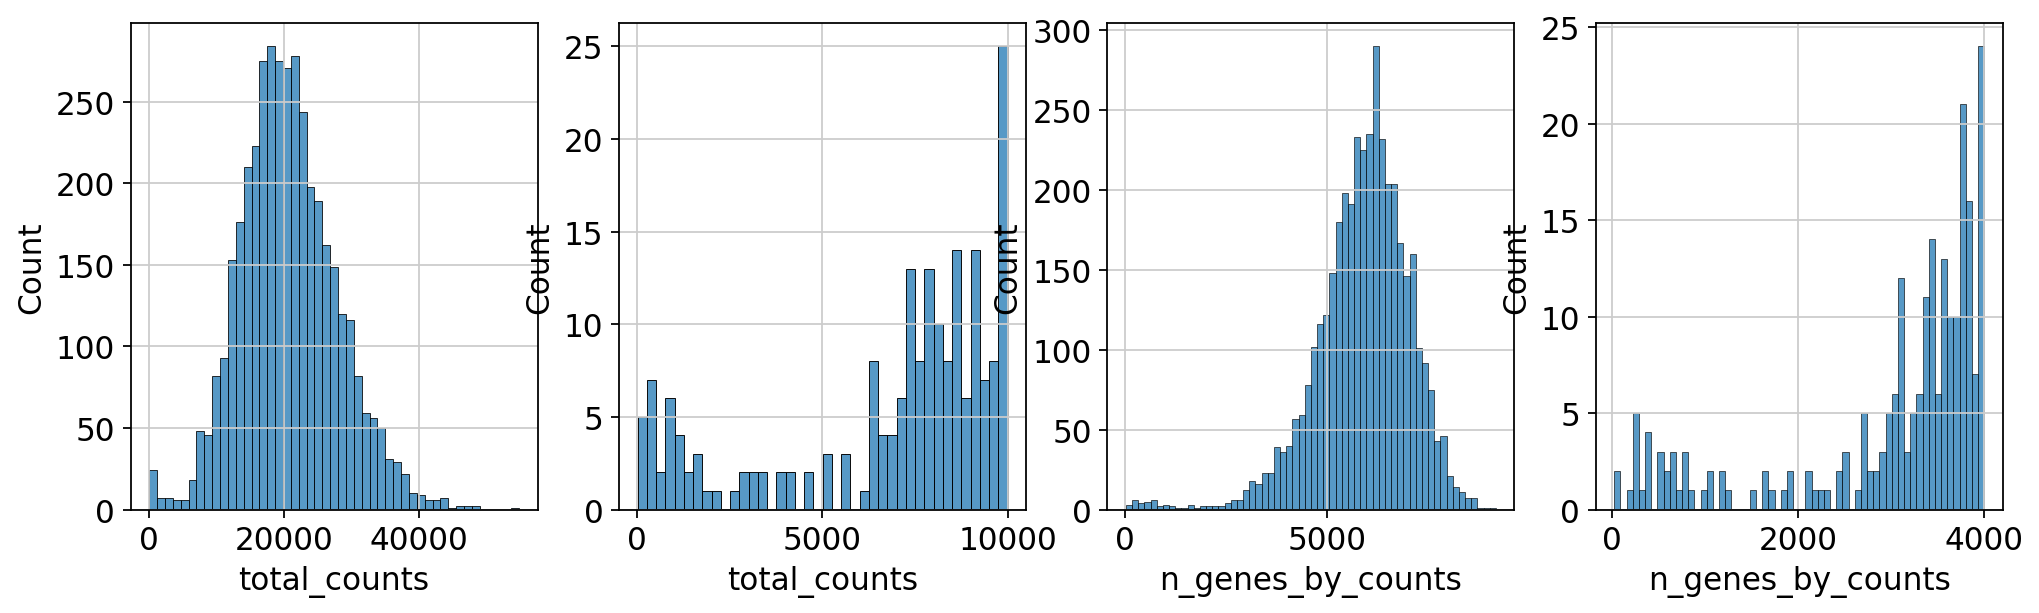

In [10]:
# qc plotting: histplot
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

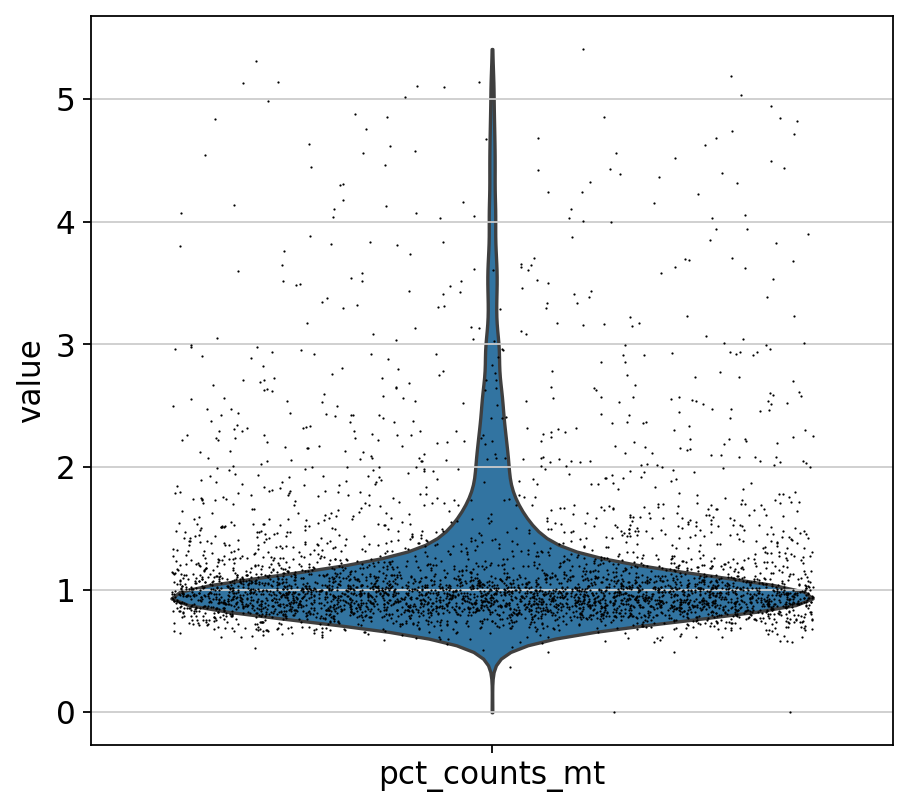

In [11]:
# violin plot of the pct_counts_mt
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

In [12]:
# filting: min_counts, max_counts, mt, min_cells
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 44 cells that have less than 5000 counts
filtered out 130 cells that have more than 35000 counts
#cells after MT filter: 3861
filtered out 16916 genes that are detected in less than 10 cells


/home/yc/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [13]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [14]:
sc.pp.pca(adata) # Defaults to 50
sc.pp.neighbors(adata) # n_neighbors : int (default: 15)
sc.tl.umap(adata) # min_dist : float (default: 0.5)
sc.tl.leiden(adata, key_added="leiden") # resolution : float (default: 1)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


2023-02-10 12:00:59.272263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 12:00:59.350964: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-10 12:00:59.369406: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-10 12:00:59.765146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/yc/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


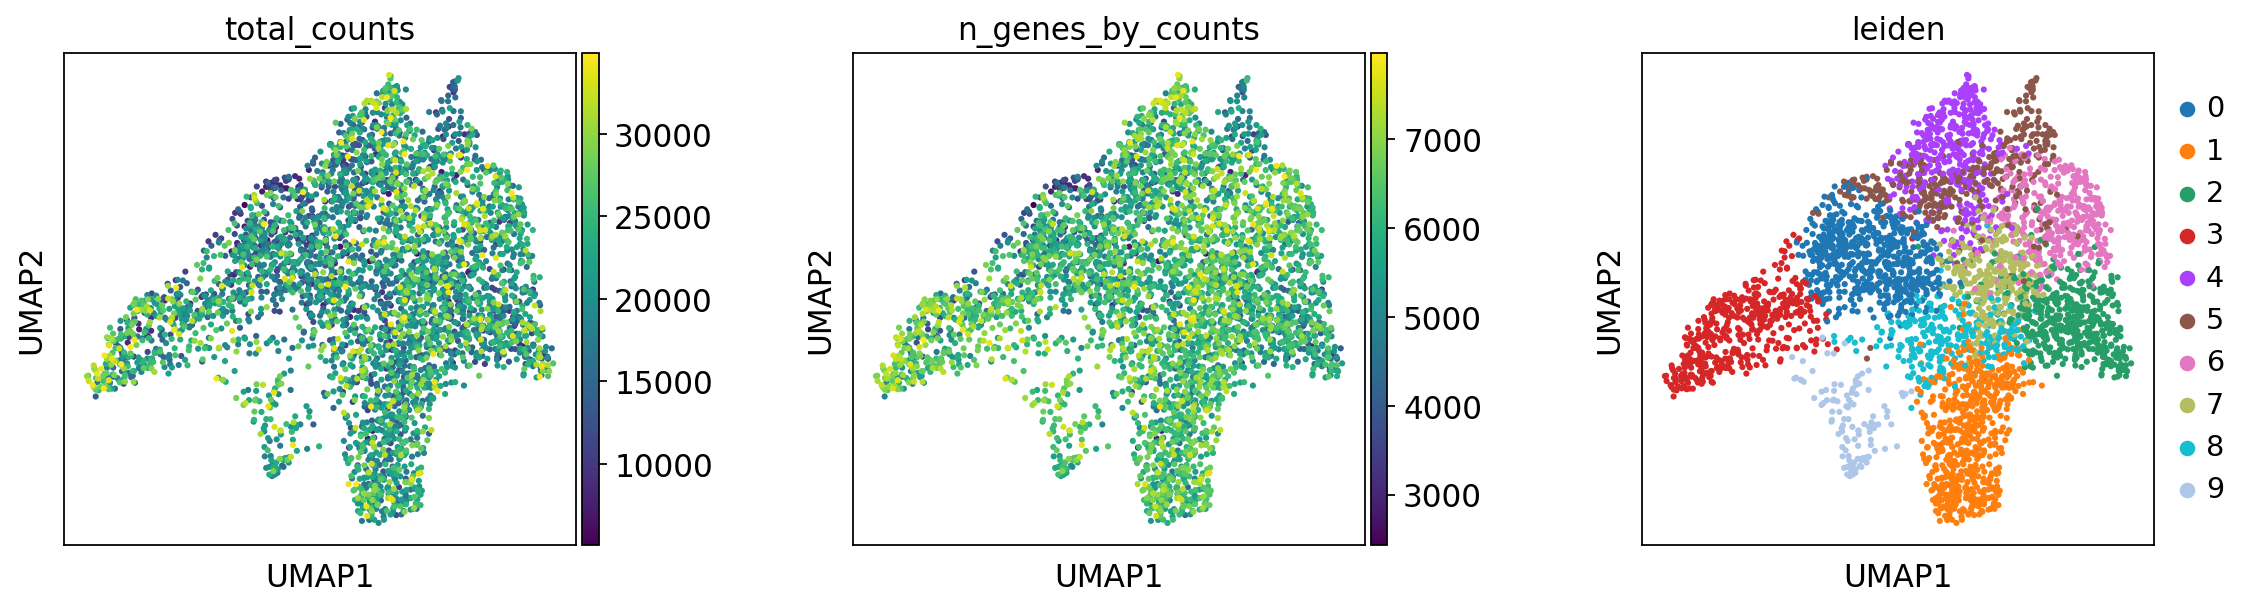

In [15]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

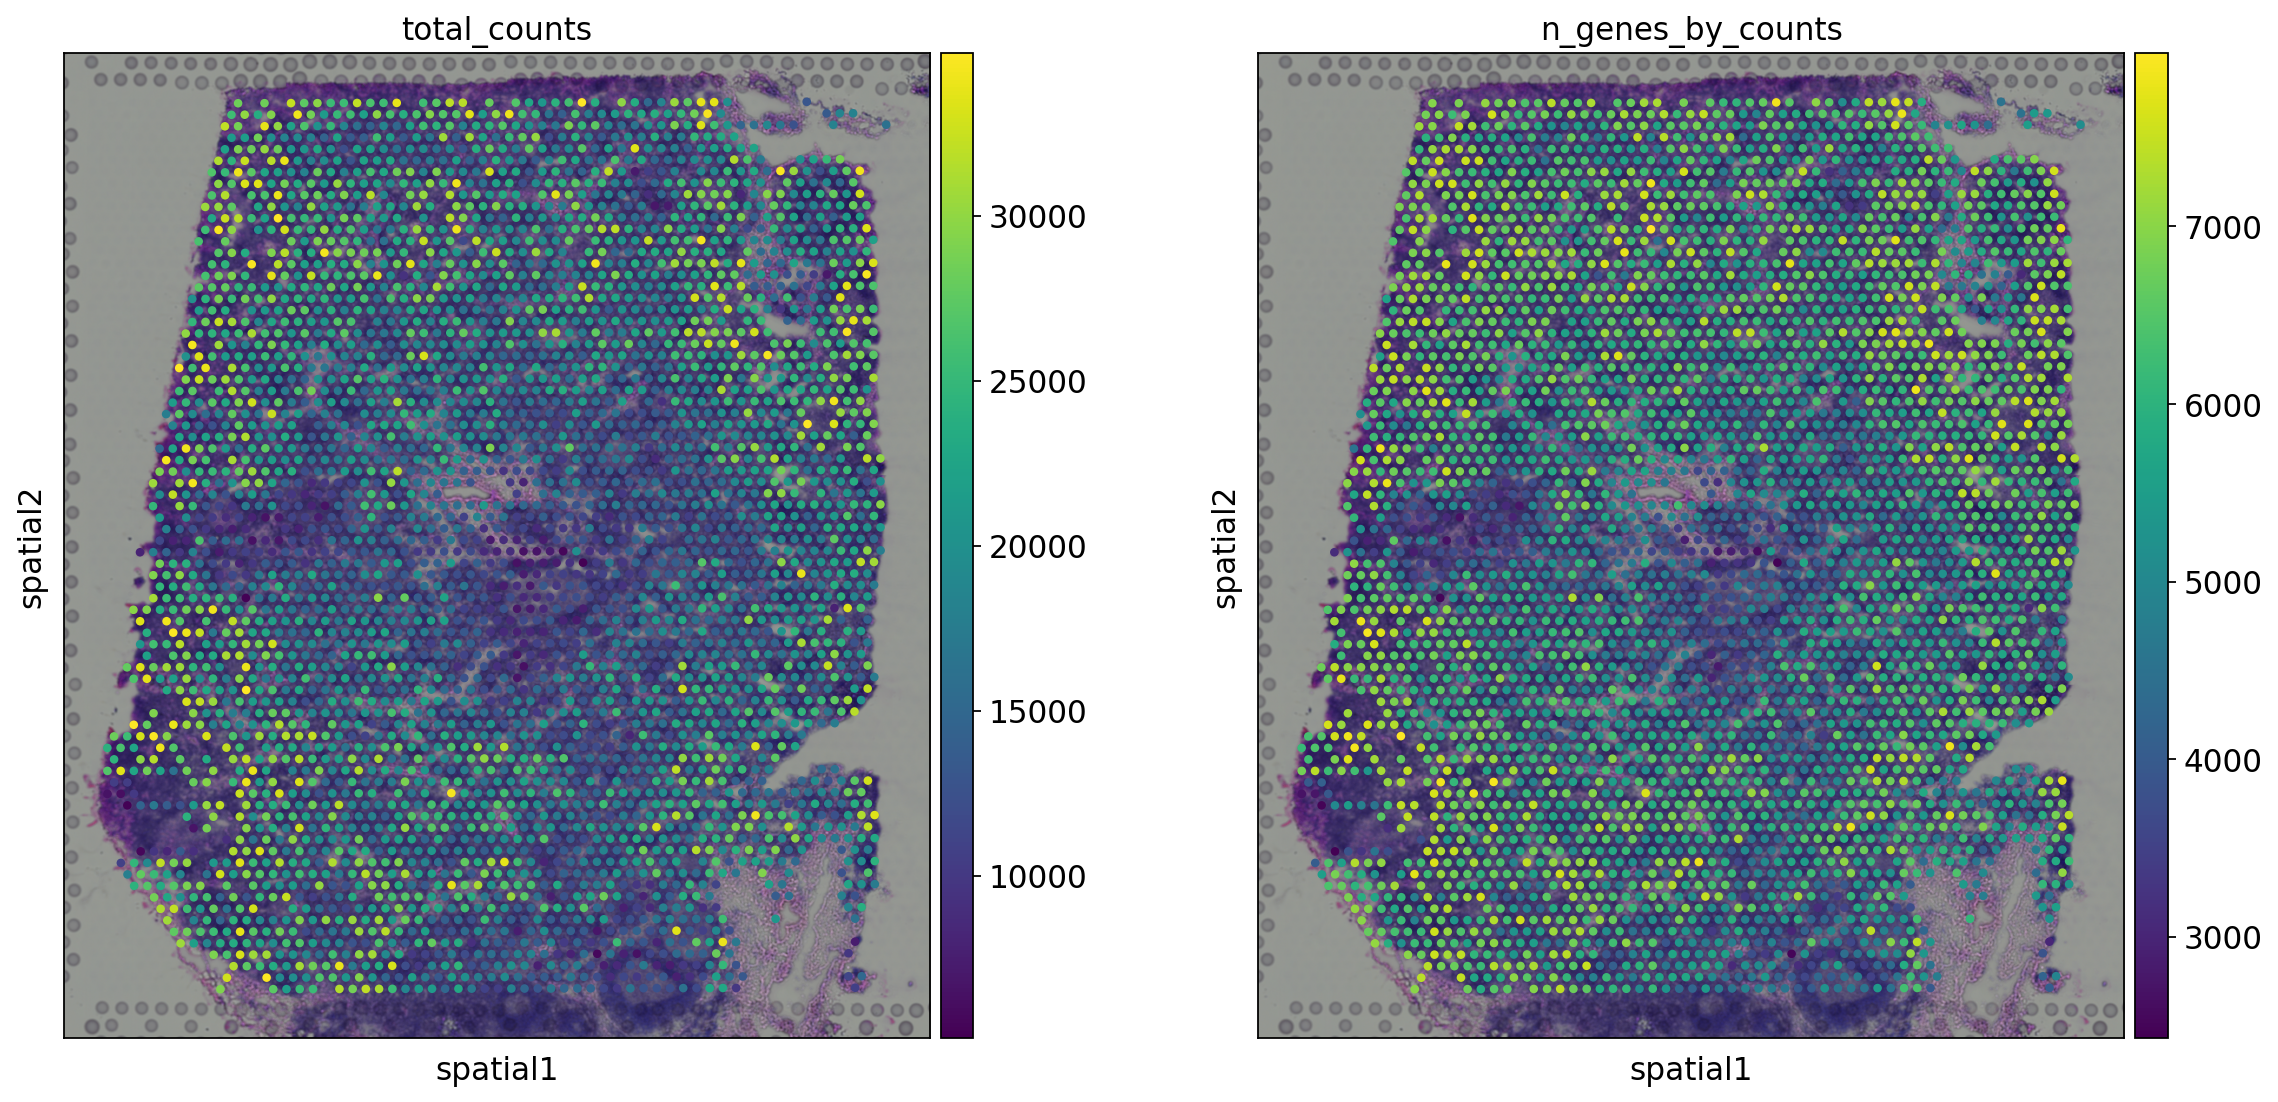

In [10]:

plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

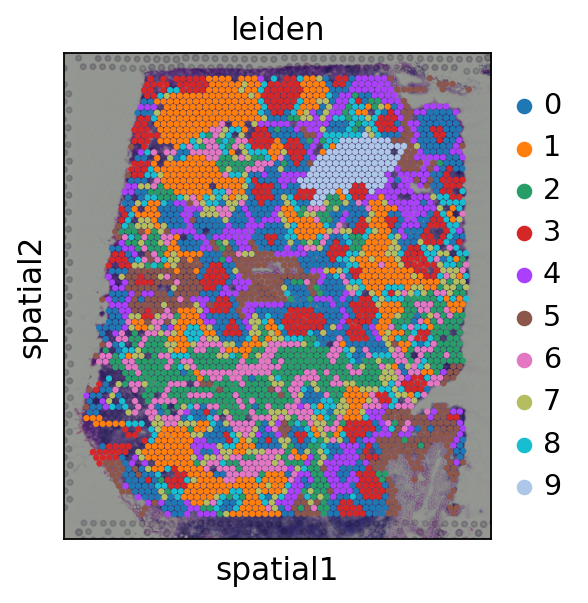

In [16]:
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.5)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
categories: 0, 1, 2, etc.
var_group_labels: 2


/home/yc/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


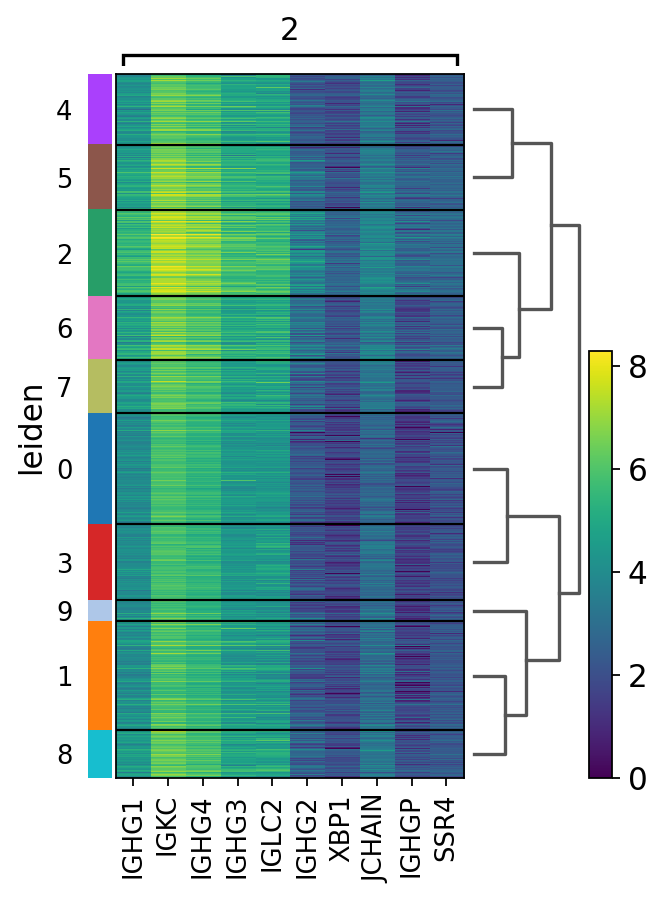

In [18]:
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="2", n_genes=10, groupby="leiden")

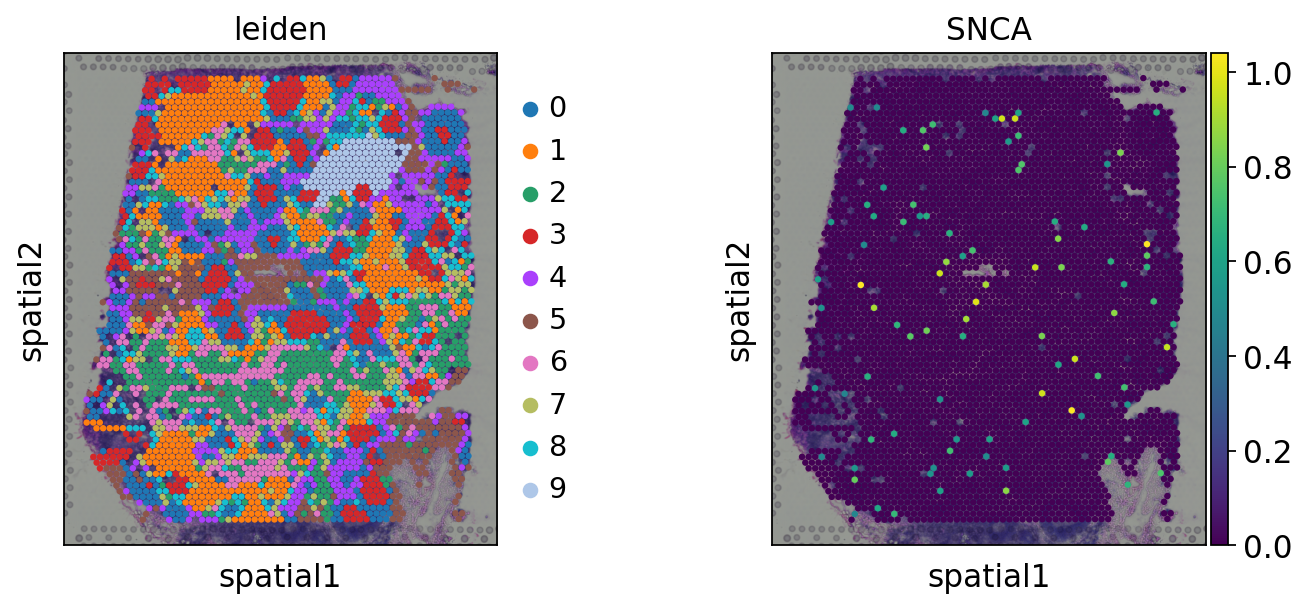

In [23]:
sc.pl.spatial(adata, img_key="hires", color=["leiden", "SNCA"], size=1.5,)